In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import nltk

In [5]:
from nltk.corpus import stopwords

In [6]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from gensim.models import Word2Vec

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
from collections import Counter

In [12]:
import re

In [13]:
import pandas as pd
df = pd.read_csv("C:/Users/Gülnur/Desktop/kadin_giyim_urunleri.csv", encoding='utf-8')
df.head(100 )

,Kategori,Ürün Adı,Renk,Bel Tipi,Paça Tipi,Kumaş,Detay,Kapatma,Cep Bilgisi,Stil Önerisi,Kalıp
0,Pantolon,Yüksek Bel Düz Paça Pantolon,Krem,Orta Bel,Bol Paça,Viskon,Dikiş Detaylı,Yan Fermuar,Arka Cep Detaylı,Sneaker ve tişörtle günlük kullanım,Dar Kalıp
1,Pantolon,Yüksek Bel Düz Paça Pantolon,Kahverengi,Yüksek Bel,Düz Paça,Dokuma,Biyeli,Yan Fermuar,Arka Cep Detaylı,Gömlek ve topuklu ile ofise uygun,Dar Kalıp
2,Pantolon,Orta Bel Düz Paça Pantolon,Lacivert,Yüksek Bel,Bol Paça,Viskon,Dikiş Detaylı,Yan Fermuar,İki Yan Cep,Triko kazakla kışlık kombin,Rahat Kalıp
3,Pantolon,Yüksek Bel Bol Paça Pantolon,Bej,Yüksek Bel,Düz Paça,Polyester,Minimal,Yan Fermuar,İki Yan Cep,Gömlek ve topuklu ile ofise uygun,Rahat Kalıp
4,Pantolon,Orta Bel Geniş Paça Pantolon,Lacivert,Orta Bel,Bol Paça,Keten,Pileli,Düğmeli,Arka Cep Detaylı,Triko kazakla kışlık kombin,Rahat Kalıp
...,...,...,...,...,...,...,...,...,...,...,...
95,Pantolon,Orta Bel Düz Paça Pantolon,Lacivert,Orta Bel,Bol Paça,Polyester,Dikiş Detaylı,Lastikli,Cepsiz,Blazer ceketle şık kombin,Standart Kalıp
96,Pantolon,Yüksek Bel Düz Paça Pantolon,Gri,Orta Bel,Bol Paça,Polyester,Minimal,Lastikli,İki Yan Cep,Crop top ile modern stil,Standart Kalıp
97,Pantolon,Orta Bel Düz Paça Pantolon,Kahverengi,Orta Bel,Bol Paça,Pamuklu,Pileli,Yan Fermuar,İki Yan Cep,Gömlek ve topuklu ile ofise uygun,Rahat Kalıp
98,Pantolon,Orta Bel Bol Paça Pantolon,Kahverengi,Orta Bel,Düz Paça,Dokuma,Kuşaklı,Yan Fermuar,Arka Cep Detaylı,Sneaker ve tişörtle günlük kullanım,Standart Kalıp


In [14]:
renk = df['Renk'].str.lower().str.split()

In [15]:
print("Sütunlar:", df.columns.tolist())

Sütunlar: ['Kategori', 'Ürün Adı', 'Renk', 'Bel Tipi', 'Paça Tipi', 'Kumaş', 'Detay', 'Kapatma', 'Cep Bilgisi', 'Stil Önerisi', 'Kalıp']


In [16]:
!pip help install


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

Description:
  Install packages from:
  
  - PyPI (and other indexes) using requirement specifiers.
  - VCS project urls.
  - Local project directories.
  - Local or remote source archives.
  
  pip also supports installing from "requirements files", which provide
  an easy way to specify a whole environment to be installed.

Install Options:
  -r, --requirement <file>    Install from the given requirements file. This
                              option can be used multiple times.
  -c, --constraint <file>     Constrain versions using the given constraints
                              file. This option can be used multiple times.
  --no-deps                   Don't install p

In [17]:
renk_listesi = [
    'kırmızı', 'mavi', 'yeşil', 'sarı', 'siyah', 'beyaz', 'gri', 'mor',
    'turuncu', 'pembe', 'bej', 'kahverengi', 'lacivert', 'bordo', 'altın', 'gümüş'
]

color_palette = {
    'kırmızı': (255, 0, 0),
    'mavi': (0, 0, 255),
    'yeşil': (0, 128, 0),
    'sarı': (255, 255, 0),
    'siyah': (0, 0, 0),
    'beyaz': (255, 255, 255),
    'gri': (128, 128, 128),
    'mor': (128, 0, 128),
    'turuncu': (255, 165, 0),
    'pembe': (255, 192, 203),
    'bej': (245, 245, 220),
    'kahverengi': (165, 42, 42),
    'lacivert': (0, 0, 139),
    'bordo': (128, 0, 32),
    'altın': (255, 215, 0),
    'gümüş': (192, 192, 192)
}

In [18]:
def tokenize(text):
    return re.findall(r'\b\w+\b', str(text).lower())

def renk_ayikla(tokens):
    return [tok for tok in tokens if tok in renk_listesi]

In [19]:
df['description'] = df['Ürün Adı'] + ' ' + df['Renk'] + ' ' + df['Stil Önerisi']

In [20]:
def tokenize(text):
    return text.lower().split()

In [21]:
def renk_ayikla(tokens):
    renkler_listesi = [
        'siyah', 'beyaz', 'kırmızı', 'mavi', 'yeşil', 'sarı',
        'kahverengi', 'bej', 'lacivert', 'gri', 'turuncu', 'mor',
        'pembe', 'zeytin', 'bordo', 'ekru'
    ]
    return [token for token in tokens if token in renkler_listesi]

In [22]:
df['tokens'] = df['description'].apply(tokenize)
df['renkler'] = df['tokens'].apply(renk_ayikla)

In [23]:
print(df[['description', 'tokens', 'renkler']].head())

                                         description  \
0  Yüksek Bel Düz Paça Pantolon Krem Sneaker ve t...   
1  Yüksek Bel Düz Paça Pantolon Kahverengi Gömlek...   
2  Orta Bel Düz Paça Pantolon Lacivert Triko kaza...   
3  Yüksek Bel Bol Paça Pantolon Bej Gömlek ve top...   
4  Orta Bel Geniş Paça Pantolon Lacivert Triko ka...   

                                              tokens       renkler  
0  [yüksek, bel, düz, paça, pantolon, krem, sneak...            []  
1  [yüksek, bel, düz, paça, pantolon, kahverengi,...  [kahverengi]  
2  [orta, bel, düz, paça, pantolon, lacivert, tri...    [lacivert]  
3  [yüksek, bel, bol, paça, pantolon, bej, gömlek...         [bej]  
4  [orta, bel, geniş, paça, pantolon, lacivert, t...    [lacivert]  


In [24]:
genis_renk_eslestirme = {
    'açık mavi': 'mavi',
    'koyu mavi': 'mavi',
    'açık yeşil': 'yeşil',
    'koyu yeşil': 'yeşil',
    'açık pembe': 'pembe',
    'koyu pembe': 'pembe',
    'lacivert': 'mavi',
    'bej': 'bej',
    'krem': 'beyaz',
    'siyah': 'siyah',
    'beyaz': 'beyaz',
    'gri': 'gri',
    'kahverengi': 'kahverengi',
    'zeytin yeşili': 'yeşil',
    'bordo': 'kırmızı',
    'ekru': 'beyaz',
    'mavi': 'mavi',
    'yeşil': 'yeşil',
    'kırmızı': 'kırmızı',
    'turuncu': 'turuncu',
    'mor': 'mor',
    'pembe': 'pembe',
    'sarı': 'sarı'
}

In [25]:
def renk_ayikla_genis_ve_kisa(description):
    description = description.lower()
    matched_colors = []

    for renk_ifadesi, temel_renk in genis_renk_eslestirme.items():
        if renk_ifadesi in description:
            matched_colors.append(temel_renk)

    return list(set(matched_colors))

In [26]:
if 'description' not in df.columns:
    df['description'] = df['Ürün Adı'] + ' ' + df['Renk'] + ' ' + df['Stil Önerisi']

In [27]:
df['renkler'] = df['description'].apply(renk_ayikla_genis_ve_kisa)

In [28]:
print(df[['description', 'renkler']].head())

                                         description       renkler
0  Yüksek Bel Düz Paça Pantolon Krem Sneaker ve t...       [beyaz]
1  Yüksek Bel Düz Paça Pantolon Kahverengi Gömlek...  [kahverengi]
2  Orta Bel Düz Paça Pantolon Lacivert Triko kaza...        [mavi]
3  Yüksek Bel Bol Paça Pantolon Bej Gömlek ve top...         [bej]
4  Orta Bel Geniş Paça Pantolon Lacivert Triko ka...        [mavi]


In [29]:
pip install pandas gensim scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [30]:
from gensim.models import Word2Vec

In [31]:
descriptions = df['description'].apply(tokenize)

In [32]:
model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=1, workers=4)

In [33]:
word_vector = model.wv['pantolon']

In [34]:
print(word_vector)

[-0.03748853  0.05931719 -0.04615803  0.00572707  0.05743176 -0.10090315
  0.05067069  0.1638476  -0.0918536  -0.11250623 -0.0166147  -0.12191105
 -0.00955458  0.06305717  0.08482777 -0.0865977   0.05112246 -0.00690355
 -0.02451701 -0.13297379  0.04363739  0.03516087  0.08106344 -0.02373026
  0.01974987 -0.00205934 -0.07260679  0.00262814 -0.05105321  0.0297623
  0.09280664 -0.08990817  0.04047932 -0.1564821  -0.03428071  0.10339823
  0.01949509  0.02137862 -0.02060735 -0.10736489 -0.01119519 -0.05970324
 -0.02963166  0.05458191  0.05710921 -0.00999339 -0.07592175 -0.06515166
  0.03994746  0.04724141  0.02068777 -0.06535689 -0.04162805 -0.06166052
 -0.01822909 -0.01466344  0.04547732 -0.05594565 -0.07253364 -0.01483698
  0.02317678 -0.01071342  0.0973083   0.03439705 -0.08863842  0.16085064
  0.01549709  0.13468905 -0.15383857  0.10146376  0.01183002  0.08273374
  0.1229137   0.04024289  0.13476738  0.00039851 -0.00880813  0.04454806
 -0.06140966 -0.0358837  -0.09778586 -0.05317974 -0.

In [35]:
from gensim.models import Word2Vec

In [36]:
descriptions = df['description'].apply(tokenize)

In [37]:
model = Word2Vec(sentences=descriptions, vector_size=100, window=5, min_count=1, workers=4)

In [38]:
word_vector = model.wv['elbise']

In [39]:
print(word_vector)

[-0.0359868   0.0539345  -0.03451698  0.01540062  0.04141029 -0.10034758
  0.05885434  0.15068713 -0.07216884 -0.10691248 -0.01411346 -0.12142661
 -0.01287046  0.04735109  0.07033733 -0.0860599   0.04039342 -0.02531994
 -0.00443847 -0.12330181  0.05745338  0.02729586  0.0706072  -0.01123626
  0.00683696  0.00387766 -0.08050118 -0.00411712 -0.04798863  0.01166569
  0.08684438 -0.07400434  0.05047346 -0.14880209 -0.01884062  0.08742867
  0.02776477  0.02425309 -0.02706983 -0.08911468 -0.00989236 -0.06574474
 -0.02566626  0.04810684  0.04063557 -0.02197045 -0.06349136 -0.05568341
  0.04183497  0.04699326  0.01486265 -0.05610679 -0.02845217 -0.04030525
 -0.01517341 -0.00532637  0.049792   -0.05546552 -0.07161416  0.00113675
  0.02398555 -0.00900681  0.0867639   0.03090616 -0.07909787  0.13646777
  0.00253823  0.12660904 -0.13291758  0.0802958   0.00570389  0.07072382
  0.1174808   0.03336044  0.13933353 -0.00550066 -0.02035128  0.04517132
 -0.05027554 -0.03692794 -0.09697993 -0.04371138 -0

In [40]:
color_palette = {
    'kırmızı': [255, 0, 0],
    'yeşil': [0, 255, 0],
    'mavi': [0, 0, 255],
    'sarı': [255, 255, 0],
    'beyaz': [255, 255, 255],
    'siyah': [0, 0, 0],
    'gri': [128, 128, 128],
    'bej': [245, 245, 220],
    'krem': [255, 253, 208],
    'lacivert': [0, 0, 128],
    'kahverengi': [139, 69, 19],
    'zeytin yeşili': [128, 128, 0],
    'bordo': [128, 0, 0],
    'ekru': [255, 255, 230],
    'açık mavi': [173, 216, 230],
    'koyu mavi': [0, 0, 139],
    'açık yeşil': [144, 238, 144],
    'koyu yeşil': [0, 100, 0],
    'açık pembe': [255, 182, 193],
    'koyu pembe': [255, 20, 147],
    'turuncu': [255, 165, 0],
    'mor': [128, 0, 128],
    'pembe': [255, 192, 203],
    'sarı': [255, 255, 0]
}

In [41]:
rgb_vectors = {
    renk: np.pad(np.array(rgb), (0, 100 - len(rgb)), 'constant')
    for renk, rgb in color_palette.items()
}

In [42]:
renk_rgb_eslesme = {}
for renk, vec in rgb_vectors.items():
    similarities = {
        rgb_name: cosine_similarity([vec], [rgb_vec])[0][0]
        for rgb_name, rgb_vec in rgb_vectors.items()
    }
    en_yakin_rgb = max(similarities, key=similarities.get)
    renk_rgb_eslesme[renk] = {
        'en_yakin_rgb': en_yakin_rgb,
        'rgb_degeri': color_palette[en_yakin_rgb],
        'benzerlik': similarities[en_yakin_rgb]
    }

In [43]:
for renk, bilgiler in renk_rgb_eslesme.items():
    print(f"{renk}: En yakın RGB = {bilgiler['en_yakin_rgb']}, "
          f"RGB değeri = {bilgiler['rgb_degeri']}, "
          f"Benzerlik = {bilgiler['benzerlik']:.4f}")

kırmızı: En yakın RGB = kırmızı, RGB değeri = [255, 0, 0], Benzerlik = 1.0000
yeşil: En yakın RGB = yeşil, RGB değeri = [0, 255, 0], Benzerlik = 1.0000
mavi: En yakın RGB = mavi, RGB değeri = [0, 0, 255], Benzerlik = 1.0000
sarı: En yakın RGB = sarı, RGB değeri = [255, 255, 0], Benzerlik = 1.0000
beyaz: En yakın RGB = beyaz, RGB değeri = [255, 255, 255], Benzerlik = 1.0000
siyah: En yakın RGB = kırmızı, RGB değeri = [255, 0, 0], Benzerlik = 0.0000
gri: En yakın RGB = gri, RGB değeri = [128, 128, 128], Benzerlik = 1.0000
bej: En yakın RGB = bej, RGB değeri = [245, 245, 220], Benzerlik = 1.0000
krem: En yakın RGB = krem, RGB değeri = [255, 253, 208], Benzerlik = 1.0000
lacivert: En yakın RGB = mavi, RGB değeri = [0, 0, 255], Benzerlik = 1.0000
kahverengi: En yakın RGB = kahverengi, RGB değeri = [139, 69, 19], Benzerlik = 1.0000
zeytin yeşili: En yakın RGB = sarı, RGB değeri = [255, 255, 0], Benzerlik = 1.0000
bordo: En yakın RGB = kırmızı, RGB değeri = [255, 0, 0], Benzerlik = 1.0000
ekr

In [44]:
sentences = [
    ['kırmızı', 'yeşil', 'mavi'],
    ['siyah', 'beyaz', 'gri'],
    ['bej', 'krem', 'ekru'],
    ['lacivert', 'koyu mavi'],
    ['açık pembe', 'pembe'],
    ['bordo', 'kahverengi'],
    ['turuncu', 'sarı'],
    ['zeytin yeşili', 'koyu yeşil']
]

In [45]:
model = Word2Vec(sentences=sentences, vector_size=100, window=2, min_count=1, workers=4)

In [46]:
vector_kirmizi = model.wv['kırmızı']
vector_yesil = model.wv['yeşil']

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity([vector_kirmizi], [vector_yesil])[0][0]
print(f"Kırmızı ve Yeşil benzerliği: {similarity:.4f}")

Kırmızı ve Yeşil benzerliği: 0.1528


In [48]:
metinler = df['Ürün Adı'].astype(str).str.lower().str.cat(sep=' ')

In [49]:
kelimeler = metinler.split()

In [50]:
from collections import Counter

In [51]:
frekanslar = Counter(kelimeler)

In [52]:
sorted_freqs = sorted(frekanslar.values(), reverse=True)
ranks = np.arange(1, len(sorted_freqs) + 1)

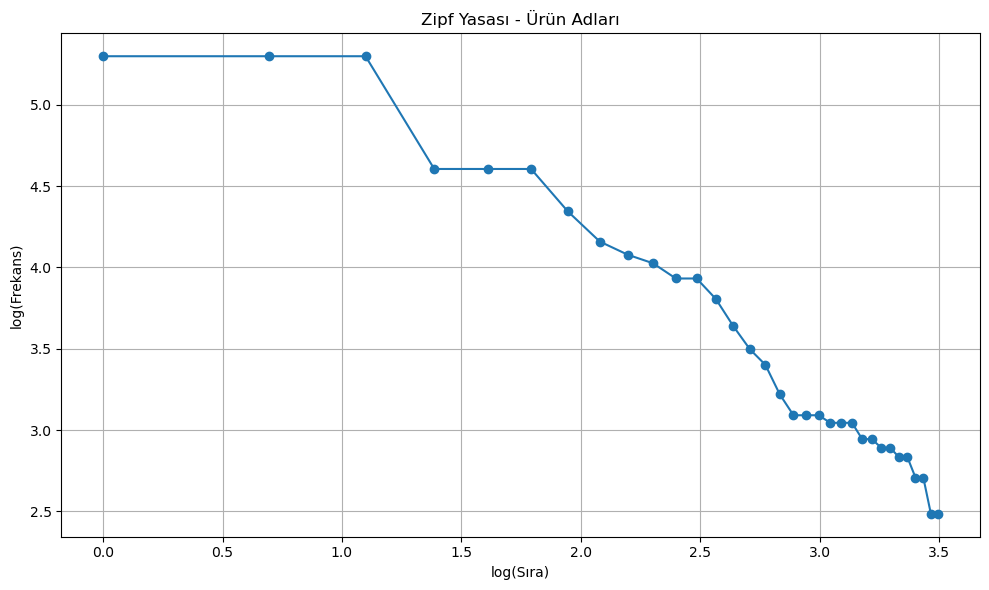

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(np.log(ranks), np.log(sorted_freqs), marker='o', linestyle='-')
plt.title("Zipf Yasası - Ürün Adları")
plt.xlabel("log(Sıra)")
plt.ylabel("log(Frekans)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
urun_adlari = df['Ürün Adı'].dropna().astype(str)

In [55]:
vectorizer = TfidfVectorizer(lowercase=True)

In [56]:
tfidf_matrix = vectorizer.fit_transform(urun_adlari)
kelimeler = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=kelimeler)
print(tfidf_df.head())

   abiye       bel  bluz       bol  boğazlı  dantel  dekolteli  detaylı  \
0    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
1    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
2    0.0  0.367283   0.0  0.000000      0.0     0.0        0.0      0.0   
3    0.0  0.358953   0.0  0.598639      0.0     0.0        0.0      0.0   
4    0.0  0.355305   0.0  0.000000      0.0     0.0        0.0      0.0   

        düz  elbise  ...  pantolon      paça  saten  straplez  sırt  uzun  \
0  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
1  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
2  0.572924     0.0  ...  0.367283  0.367283    0.0       0.0   0.0   0.0   
3  0.000000     0.0  ...  0.358953  0.358953    0.0       0.0   0.0   0.0   
4  0.000000     0.0  ...  0.355305  0.355305    0.0       0.0   0.0   0.0   

   volanlı  yaka    yüksek  şifon  
0      0.0   0.0  0.516786    0.0  
1      0.0   0

In [57]:
print("\nVeri hazırlığı yapılıyor...")
df['description'] = df['Ürün Adı'].astype(str) + ' ' + df['Renk'].astype(str) + ' ' + df['Stil Önerisi'].astype(str)


Veri hazırlığı yapılıyor...


In [58]:
turkish_stop_words = set([
    'acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 
    'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 
    'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 
    'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 
    'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 
    'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani'
])

In [59]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
turkish_stop_words = set(stopwords.words('turkish'))
def preprocess_text(text, process_type='lemmatize'):
    try:
        text = str(text).lower()
        text = re.sub(r'[^\w\s]', '', text)
        tokens = word_tokenize(text)
        tokens = [token for token in tokens if token not in turkish_stop_words]
        tokens = [token for token in tokens if not token.isdigit()]
        tokens = [token for token in tokens if len(token) > 1]
        if process_type == 'lemmatize':
            lemmatizer = WordNetLemmatizer()
            tokens = [lemmatizer.lemmatize(token) for token in tokens]
        elif process_type == 'stem':
            stemmer = PorterStemmer()
            tokens = [stemmer.stem(token) for token in tokens]
        else:
            print("Geçersiz işlem türü, 'lemmatize' veya 'stem' seçiniz.")
        return tokens
    except Exception as e:
        print("Ön işleme hatası:", e)
        return []

In [60]:
print("\nMetin ön işleme uygulanıyor...")
df['lemmatized'] = df['description'].apply(lambda x: preprocess_text(x, 'lemmatize'))
df['stemmed'] = df['description'].apply(lambda x: preprocess_text(x, 'stem'))
print("\nÖn işleme sonrası örnek çıktı:")
print(df[['description', 'lemmatized', 'stemmed']].head())


Metin ön işleme uygulanıyor...

Ön işleme sonrası örnek çıktı:
                                         description  \
0  Yüksek Bel Düz Paça Pantolon Krem Sneaker ve t...   
1  Yüksek Bel Düz Paça Pantolon Kahverengi Gömlek...   
2  Orta Bel Düz Paça Pantolon Lacivert Triko kaza...   
3  Yüksek Bel Bol Paça Pantolon Bej Gömlek ve top...   
4  Orta Bel Geniş Paça Pantolon Lacivert Triko ka...   

                                          lemmatized  \
0  [yüksek, bel, düz, paça, pantolon, krem, sneak...   
1  [yüksek, bel, düz, paça, pantolon, kahverengi,...   
2  [orta, bel, düz, paça, pantolon, lacivert, tri...   
3  [yüksek, bel, bol, paça, pantolon, bej, gömlek...   
4  [orta, bel, geniş, paça, pantolon, lacivert, t...   

                                             stemmed  
0  [yüksek, bel, düz, paça, pantolon, krem, sneak...  
1  [yüksek, bel, düz, paça, pantolon, kahverengi,...  
2  [orta, bel, düz, paça, pantolon, lacivert, tri...  
3  [yüksek, bel, bol, paça, pantolon, bej,

In [61]:
def plot_zipf(data, title):
    try:
        all_words = [word for sublist in data for word in sublist]
        word_counts = Counter(all_words)
        sorted_counts = sorted(word_counts.values(), reverse=True)
        ranks = np.arange(1, len(sorted_counts)+1)
        
        plt.figure(figsize=(10,6))
        plt.loglog(ranks, sorted_counts, marker=".")
        plt.title(f"Zipf Yasası - {title}")
        plt.xlabel("Kelime Sırası (log)")
        plt.ylabel("Frekans (log)")
        plt.grid(True)
        plt.show()
        print(f"{title} Zipf grafiği oluşturuldu.")
    except Exception as e:
        print(f"Zipf grafiği oluşturulamadı: {e}")


Zipf analizi yapılıyor...


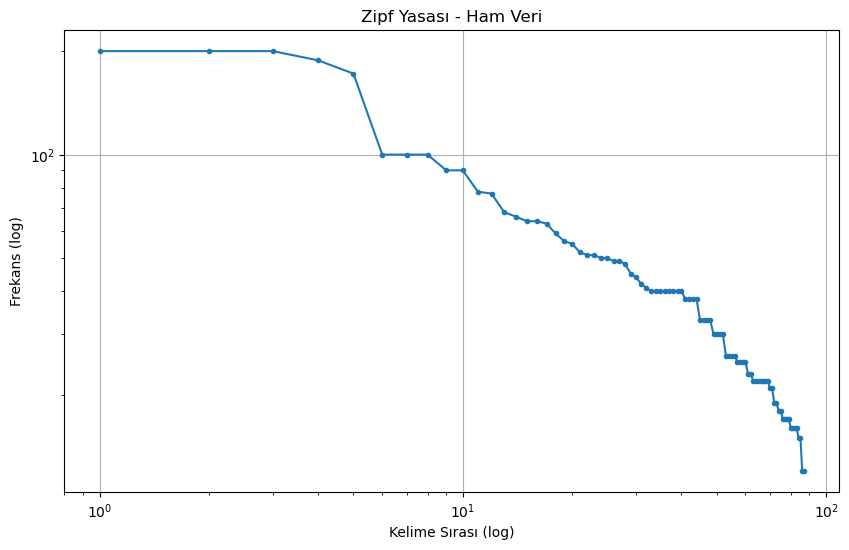

Ham Veri Zipf grafiği oluşturuldu.


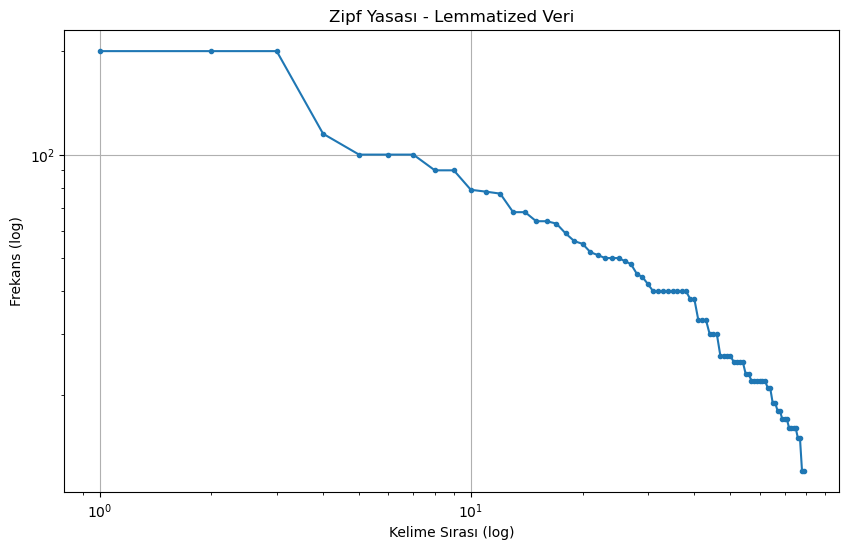

Lemmatized Veri Zipf grafiği oluşturuldu.


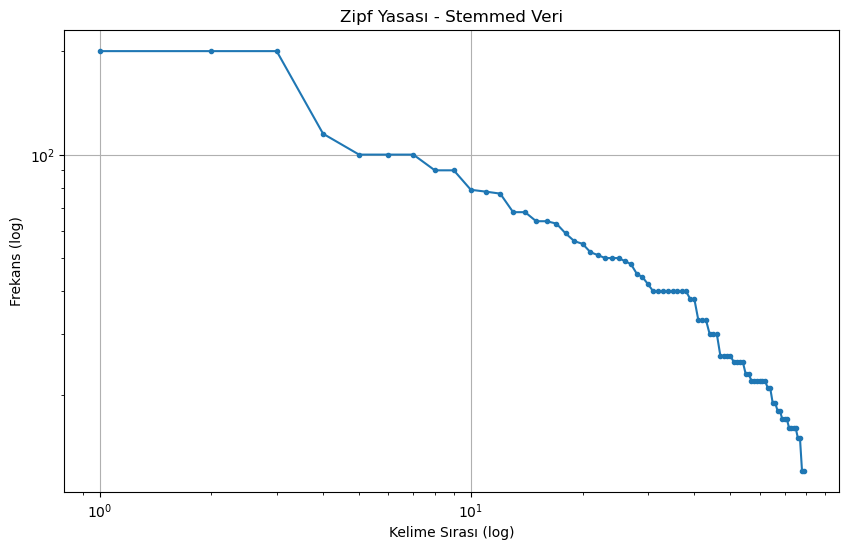

Stemmed Veri Zipf grafiği oluşturuldu.


In [62]:
print("\nZipf analizi yapılıyor...")
plot_zipf(df['description'].apply(lambda x: x.split()), "Ham Veri")
plot_zipf(df['lemmatized'], "Lemmatized Veri")
plot_zipf(df['stemmed'], "Stemmed Veri")

In [63]:
print("\nTF-IDF vektörleştirme yapılıyor...")
def create_tfidf(data, name):
    try:
        corpus = [" ".join(tokens) for tokens in data]
        vectorizer = TfidfVectorizer()
        X = vectorizer.fit_transform(corpus)
        df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
        df_tfidf.to_csv(f"tfidf_{name}.csv", index=False)
        print(f"tfidf_{name}.csv başarıyla kaydedildi. Boyut:", df_tfidf.shape)
        return df_tfidf
    except Exception as e:
        print(f"TF-IDF oluşturulamadı ({name}):", e)
        return None
tfidf_lemmatized = create_tfidf(df['lemmatized'], "lemmatized")
tfidf_stemmed = create_tfidf(df['stemmed'], "stemmed")


TF-IDF vektörleştirme yapılıyor...
tfidf_lemmatized.csv başarıyla kaydedildi. Boyut: (400, 79)
tfidf_stemmed.csv başarıyla kaydedildi. Boyut: (400, 79)


In [64]:
from gensim.models import Word2Vec

print("\nWord2Vec modelleri eğitiliyor...")

def train_word2vec(sentences, name, model_type='cbow', window=5, vector_size=100):
    try:
        model = Word2Vec(
            sentences=sentences,
            sg=1 if model_type == 'skipgram' else 0,
            window=window,
            vector_size=vector_size,
            min_count=1,
            workers=4
        )
        model.save(f"word2vec_{name}_{model_type}_w{window}_d{vector_size}.model")
        print(f"Model {name}_{model_type} kaydedildi.")
    except Exception as e:
        print(f"Model eğitilirken hata oluştu: {e}")



Word2Vec modelleri eğitiliyor...


In [65]:
def train_word2vec(sentences, name, model_type='cbow', window=5, vector_size=100):
    try:
        model = Word2Vec(
            sentences=sentences,
            sg=1 if model_type == 'skipgram' else 0,
            window=window,
            vector_size=vector_size,
            min_count=1,
            workers=4
        )
        try:
            similar = model.wv.most_similar('elbise', topn=5)
            print(f"'elbise' için benzer kelimeler: {similar}")
        except:
            print("'elbise' kelimesi modelde bulunamadı")
        model.save(f"word2vec_{name}_{model_type}_w{window}_d{vector_size}.model")
        print(f"Model {name}_{model_type} kaydedildi.")

        return model
    except Exception as e:
        print(f"Word2Vec modeli eğitilemedi ({name}):", e)
        return None

In [66]:
params = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 5, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 5, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 5, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 5, 'vector_size': 300}
]

In [67]:
for param in params:
    print(f"\n{param['model_type']} modeli eğitiliyor (window={param['window']}, dim={param['vector_size']})...")
    train_word2vec(
        sentences=df['lemmatized'],
        name='lemmatized',
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size']
    )


cbow modeli eğitiliyor (window=2, dim=100)...
'elbise' için benzer kelimeler: [('kumaş', 0.9366440773010254), ('gece', 0.9214726090431213), ('bluz', 0.9194682836532593), ('elbisesi', 0.9172019958496094), ('bir', 0.9132724404335022)]
Model lemmatized_cbow kaydedildi.

skipgram modeli eğitiliyor (window=2, dim=100)...
'elbise' için benzer kelimeler: [('kumaş', 0.9935644865036011), ('bluz', 0.9924165606498718), ('gece', 0.9920743703842163), ('elbisesi', 0.9917086958885193), ('bir', 0.9915503263473511)]
Model lemmatized_skipgram kaydedildi.

cbow modeli eğitiliyor (window=5, dim=100)...
'elbise' için benzer kelimeler: [('kumaş', 0.9801357388496399), ('paça', 0.9758625030517578), ('bluz', 0.9746795296669006), ('mezuniyet', 0.9739992618560791), ('bir', 0.9727997779846191)]
Model lemmatized_cbow kaydedildi.

skipgram modeli eğitiliyor (window=5, dim=100)...
'elbise' için benzer kelimeler: [('kumaş', 0.9981023669242859), ('gece', 0.9978724122047424), ('yeşil', 0.997841477394104), ('bej', 0.99

In [68]:
 train_word2vec(
        sentences=df['stemmed'],
        name='stemmed',
        model_type=param['model_type'],
        window=param['window'],
        vector_size=param['vector_size']
    )
print("\nTüm işlemler başarıyla tamamlandı!")

'elbise' kelimesi modelde bulunamadı
Model stemmed_skipgram kaydedildi.

Tüm işlemler başarıyla tamamlandı!
